In [1]:
from data import Data
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

# Analyzing sequential data with MLP

In [2]:
data = Data(0.01,1000,0.2)
X, Y = data[4]
print(X.shape,Y.shape)

torch.Size([996, 4]) torch.Size([996, 1])


In [3]:
class seq_MLP(nn.Module):
    def __init__(self):
        super(seq_MLP, self).__init__()
        self.first_layer = nn.Linear(4,100)
        self.second_layer = nn.Linear(100,1)

    def forward(self,X):
        X = self.first_layer(X)
        X = self.second_layer(X)
        return X

In [4]:
def train(model, in_data, out_data, epoch):
    model.train()
    optimizer.zero_grad()
    output = model(in_data)
    loss = mse_loss(output, out_data) #mean squared error
    loss.backward() #calculates gradients
    optimizer.step() #updates weights
    if epoch % 1000 == 0:
        print(loss.detach())

In [5]:
model = seq_MLP()
mse_loss = nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for epoch in range(0,5000):
    train(model,X,Y,epoch)

tensor(384.2903)
tensor(51.6917)
tensor(51.6917)
tensor(51.6917)
tensor(51.6917)


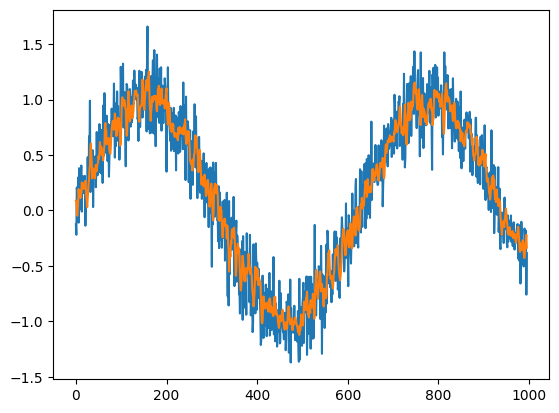

In [6]:
Y_hat = model(X).detach()
plt.plot(Y)
plt.plot(Y_hat)

looks good. This is 1-step prediction. Let's check if we are able to capture the dynamic of sine wave.

In [7]:
def predictor(X,k):
    '''Calculates first (len(X)) predictions from given data X, then using the prediction data,
    calculates next k-step predictions.
    '''
    output = torch.zeros(len(X)+k,1)
    output[:len(X)] = model(X).detach()
    X_bar = X[-1]
    for i in range(k):
        Y = model(X_bar).detach()
        X_bar = torch.cat([X_bar[:3],Y])
        output[len(X)+i] = Y
    return output

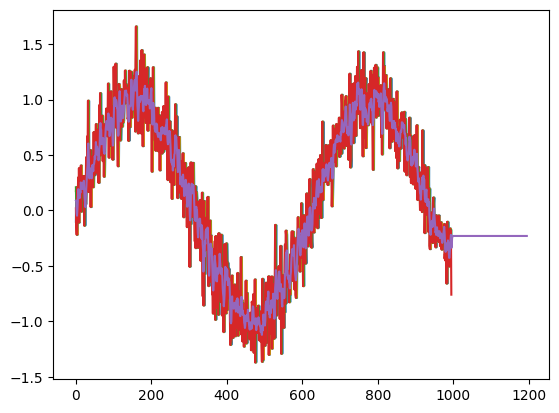

In [8]:
predictions = predictor(X,200)
plt.plot(X)
plt.plot(predictions)

Clearly, our model works perfectly for predicting next step, but it fails significantly on next steps. The error accumulates at each step as we use previous predictions to make new predictions, causing the model to quickly approximate to a constant value. Even though this can be solved by creating an autoregressive MLP, I will skip this and move on with RNN, which works much better for sequential data.